In [3]:
#dependencies
from citipy import citipy as cp
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import os 
import seaborn
import numpy as np


In [85]:
#key stored a couple of folders back
key = open(os.path.join("../../api_weather.txt"))

In [86]:
#save key
api_key=key.read()


In [87]:
#lattitudes evenly from -90 to 90
lat=np.arange(-90,90,.18)

In [88]:
#random longitudes from -180 to 180
lng=np.random.randint(low=-180, high=180, size=1000)

In [89]:
#zip togehter
cord=list(zip(lat,lng))

In [90]:
#find city names an countries nearest these coordinates as sample
cities=[]
cc=[]
for x in range(len(cord)):
    cities.append(cp.nearest_city(cord[x][0],cord[x][1]).city_name)
    cc.append(cp.nearest_city(cord[x][0],cord[x][1]).country_code)


In [91]:
#call weather api and collect responses
weather=[]
for x in range(len(cc)):
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[x]+','+cc[x]+api_key
    weather.append(req.get(url).json())

In [92]:
#sort out data from responses...
temp=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        temp.append("NaN")
    else: temp.append(weather[x]['main']['temp'])


In [93]:
humidity=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        humidity.append("NaN")
    else: humidity.append(weather[x]['main']['humidity'])


In [94]:
clouds=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        clouds.append("NaN")
    else: clouds.append(weather[x]['clouds']['all'])


In [95]:
windspeed=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        windspeed.append("NaN")
    else: windspeed.append(weather[x]['wind']['speed'])


In [96]:
latitude=[]
for x in range(len(weather)):
    if weather[x] == {'cod': '404', 'message': 'city not found'}:
        latitude.append("NaN")
    else: latitude.append(weather[x]['coord']['lat'])


In [97]:
#organize data in pandas
weather_data=pd.DataFrame({'lat':latitude,'city':cities,'country':cc,'temp':temp,'humidity':humidity,'clouds':clouds,'windspeed':windspeed})

In [98]:
weather_data.to_csv('weather_data.csv')


In [4]:
#weather_data=pd.read_csv('weather_data.csv')

In [13]:
#sample data
sample_df=weather_data.dropna().sample(n=500)
sample_df.head()

,Unnamed: 0,city,clouds,country,humidity,lat,temp,windspeed
47,47,ushuaia,75.0,ar,47.0,-54.81,288.150,11.30
733,733,laramie,75.0,us,58.0,41.31,273.970,3.10
258,258,castro,92.0,cl,82.0,-42.48,290.283,1.67
687,687,yabrud,0.0,sy,47.0,33.97,287.150,1.02
457,457,atambua,36.0,id,100.0,-9.11,298.608,0.52


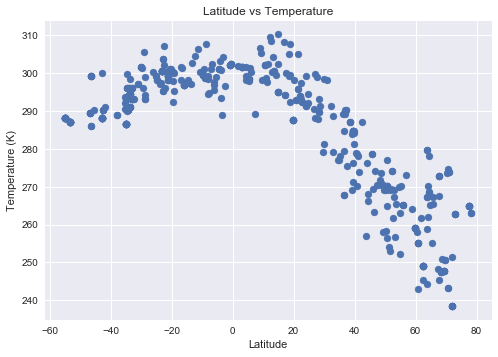

In [8]:
#plot!
plt.scatter(x=sample_df['lat'],y=sample_df['temp'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (K)')
plt.title("Latitude vs Temperature")
plt.savefig('Latitude vs Temperature.png')
plt.show()


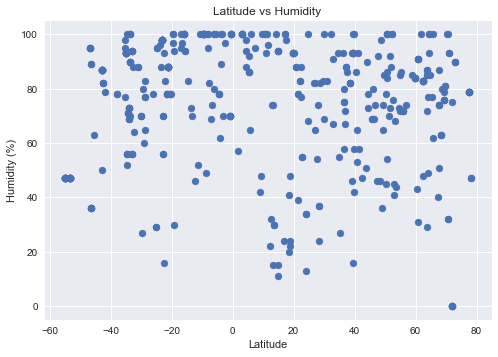

In [9]:
plt.scatter(x=sample_df['lat'],y=sample_df['humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Latitude vs Humidity ")
plt.savefig('Latitude vs Humidity.png')
plt.show()


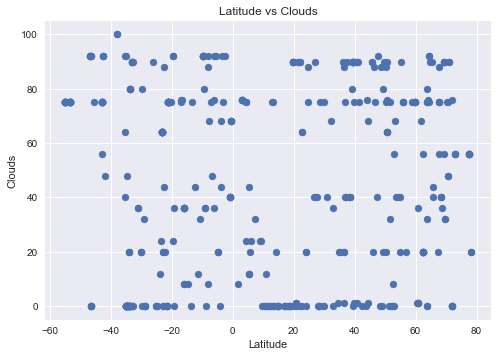

In [10]:
plt.scatter(x=sample_df['lat'],y=sample_df['clouds'])
plt.xlabel('Latitude')
plt.ylabel('Clouds')
plt.title("Latitude vs Clouds")
plt.savefig('Latitude vs Clouds.png')
plt.show()


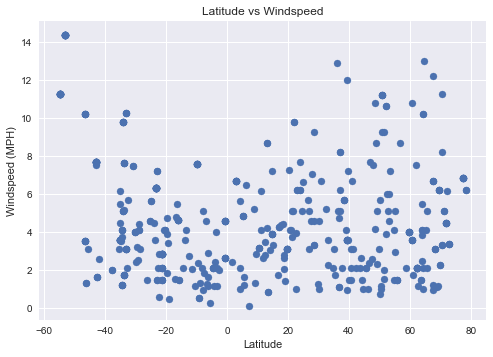

In [11]:
plt.scatter(x=sample_df['lat'],y=sample_df['windspeed'])
plt.xlabel('Latitude')
plt.ylabel('Windspeed (MPH)')
plt.title("Latitude vs Windspeed")
plt.savefig('Latitude vs Windspeed.png')
plt.show()
